<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/OUTLIER2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle update # instalamos kaggle. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
# así me conecto como siempre a mi drive. 

Mounted at /content/gdrive


In [3]:
# antes de nada subimos en temporal kaggle.json. OJO CON ESTO QUE NO ME ENTERO. tengo que subirlo en google colaborate. en la parte izquierda me pongo en la carpeta y en la flecha de subir.
# posteriormente elijo el archivo json del ordenador y lo subo. 
!mkdir -p ~/.kaggle # creamos el provisional directorio de kaggle. 

In [4]:
! cp kaggle.json ~/.kaggle/ # llevamos el archivo al directorio creado.

In [5]:
! chmod 600 ~/.kaggle/kaggle.json # le damos permios para acceder. 

In [ ]:
# importante en kaggle me tengo que poner en dataset y buscar lo que necesito. si lo encuentro tengo que poner despúes de download por ejemplo
# en este caso pone esto https://www.kaggle.com/datasets/hellbuoy/car-price-prediction y que lo que debo poner después de download es a partir de hellbuoy
! kaggle datasets download arenagrenade/the-complete-pokemon-images-data-set
# aqui es cuando no es competición e igualmente solo tenemos que meter después del download lo siguiente “https://www.kaggle.com/arenagrenade/the-complete-pokemon-images-data-set”
# arenagrenade/the-complete-pokemon-images-data-set”

In [17]:
!kaggle kernels output mayurdalvi/outliers-removal-complete-guide-zscore-iqr -p /path/to/dest

Kernel log downloaded to /path/to/dest/outliers-removal-complete-guide-zscore-iqr.log 


In [9]:
# para bajarme este archivo lo que he hecho ha sido descargarlo al ordenador y luego meterlo en mi kaggle como dataset. 
# He ido a dataset doy a your work y arrastro el archivo. 
! kaggle datasets download pacomm5/placement
# despues de ejecutar esto ya lo tengo en temporal en google colab. 
# otra forma de encontrarlo es buscar el nombre del autor en la dirección. lo meto en kaggle y con suerte encuentro la dirección del dataset. 

  0% 0.00/3.65k [00:00<?, ?B/s]
100% 3.65k/3.65k [00:00<00:00, 2.65MB/s]


In [13]:
! kaggle datasets download mayurdalvi/simple-linear-regression-placement-data

  0% 0.00/3.65k [00:00<?, ?B/s]
100% 3.65k/3.65k [00:00<00:00, 2.66MB/s]


In [14]:
# si los archivos vienen en zip se abren de la siguiente manera. 
import zipfile # importamos esta librería
datazip = zipfile.ZipFile("/content/placement.zip") # esta es la dirección donde esta el zip
datazip.extract("placement.csv","/content/" ) # tenemos que hacer esto para extraer solo uno. 
# a partir de este momento ya lo tenemos en temporal. 


'/content/placement.csv'

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('/content/placement.csv')

In [17]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [24]:
df.shape

(1000, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


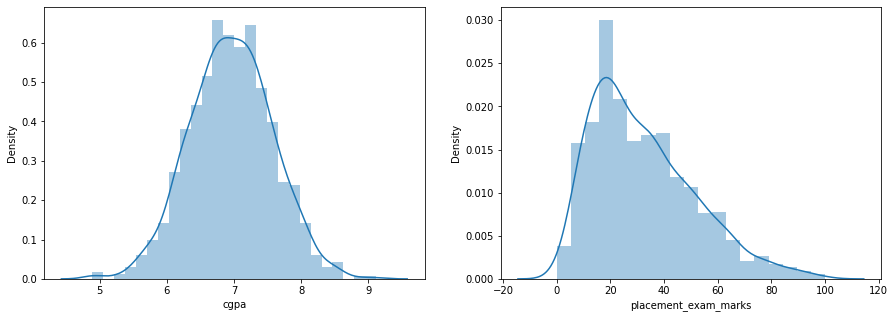

In [18]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [19]:
df['placement_exam_marks'].skew() # esto lo que nos dice es la asimetría del grafico. vemos que esta inclinada hacia la derecha. 

0.8356419499466834

In [20]:
# vamos a calcular la mediana, la desviación tipica el miinimo y el maximo. de cgpa
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())


Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [21]:
# Findig the boundary values

print("Highest Allowed", df['cgpa'].mean() + 3*df['cgpa'].std())
print('Lowest Allowed ', df['cgpa'].mean() - 3*df['cgpa'].std())

# los valores limites son tres veces la desviación standar arriba y debajo. 

Highest Allowed 8.808933625397168
Lowest Allowed  5.113546374602832


In [22]:
# Finding the outliners

df[(df['cgpa'] > 8.8 )| (df['cgpa'] < 5.11)]
# aui estamos sacando los outliers. 

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [23]:
# ahora lo que vamos a hacer en un nuevo dataframe es quedarnos solo con los que no son outliers.
# Trimming 
new_df = df[(df['cgpa'] < 8.8) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [26]:
new_df.shape

(995, 3)

In [27]:
# Calculating the Zscore

# Zscore = (val - mean)/std

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [28]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
